In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
parking_data = pd.read_csv('parkingLot (1).csv')

In [3]:
parking_data.head(10)

,vehicle_no,timestamp,camera_id
0,MHUN7063,2024-09-12 05:00:00,1
1,MHYN4677,2024-09-12 05:00:00,1
2,MHEL6595,2024-09-12 05:00:00,1
3,MHNQ2590,2024-09-12 05:00:00,1
4,MHHA0518,2024-09-12 05:00:00,1
5,MHGS9163,2024-09-12 05:00:00,1
6,MHJU1350,2024-09-12 05:00:00,1
7,MHYN8096,2024-09-12 05:00:00,1
8,MHZI0593,2024-09-12 05:00:00,1
9,MHBR3603,2024-09-12 05:00:00,1


The OCR on the camera sensor records number plates of exiting or entering vehicles and uploads it to a central database in burst of every 20 min in the following format:
- Camera ID (001 is for Entry and 002 is for Exit)
- Vehicle Number (string)
- Timestamp (pd.timestamp)


Systematic Issues in Data:
- Data is not in chronological order (by time)
- There are some $null$ values because (each camera receives scheduled update/maintenance once a week when it just updates null for every vehicle it sees for 20 minutes)
- Sometimes the sensor might replace one of the characters on the number plate with some other character on the number plate.

In [4]:
# Check for missing values
parking_data.isnull().sum()

vehicle_no    441
timestamp       0
camera_id       0
dtype: int64

In [5]:
downtimes = parking_data[parking_data['vehicle_no'].isnull()]['timestamp'].unique()
downtimes

array(['2024-09-14 09:00:00', '2024-09-14 09:20:00',
       '2024-09-21 09:00:00', '2024-09-21 09:20:00',
       '2024-09-28 09:00:00', '2024-09-28 09:20:00',
       '2024-10-05 09:00:00', '2024-10-05 09:20:00',
       '2024-10-12 09:00:00', '2024-10-12 09:20:00',
       '2024-10-19 09:00:00', '2024-10-19 09:20:00',
       '2024-10-26 09:00:00', '2024-10-26 09:20:00',
       '2024-11-02 09:00:00', '2024-11-02 09:20:00',
       '2024-11-09 09:00:00', '2024-11-09 09:20:00'], dtype=object)

Get the Number of Cameras which were down at the given time

In [6]:
downtimes = parking_data[parking_data['vehicle_no'].isnull()]
downtimes = downtimes.groupby('timestamp')['camera_id'].nunique()
downtimes

timestamp
2024-09-14 09:00:00    1
2024-09-14 09:20:00    1
2024-09-21 09:00:00    2
2024-09-21 09:20:00    2
2024-09-28 09:00:00    1
2024-09-28 09:20:00    2
2024-10-05 09:00:00    1
2024-10-05 09:20:00    1
2024-10-12 09:00:00    2
2024-10-12 09:20:00    2
2024-10-19 09:00:00    1
2024-10-19 09:20:00    2
2024-10-26 09:00:00    1
2024-10-26 09:20:00    1
2024-11-02 09:00:00    2
2024-11-02 09:20:00    2
2024-11-09 09:00:00    2
2024-11-09 09:20:00    2
Name: camera_id, dtype: int64

We see that more than one cameras can be on maintainance at a time.

# Forecasting Number of Vehicles entering the parking per day

## Grouping The Data by Day 

Get the data of number of vehicles entering per day

In [7]:
parking_data['timestamp'].dtype
parking_data['timestamp'] = pd.to_datetime(parking_data['timestamp'])

In [8]:
parking_data['Count'] = 1

In [9]:
car_entering_data = parking_data[(parking_data['camera_id'] == 1)]

In [10]:
cars_per_day = car_entering_data.groupby(pd.Grouper(key='timestamp', freq='D'))['Count'].sum()

In [11]:
cars_per_day

timestamp
2024-09-12     886
2024-09-13     809
2024-09-14     925
2024-09-15    1073
2024-09-16     843
              ... 
2024-11-09     906
2024-11-10     944
2024-11-11     828
2024-11-12     806
2024-11-13     781
Freq: D, Name: Count, Length: 63, dtype: int64

## Visualizing The Time Series

<Axes: xlabel='timestamp'>

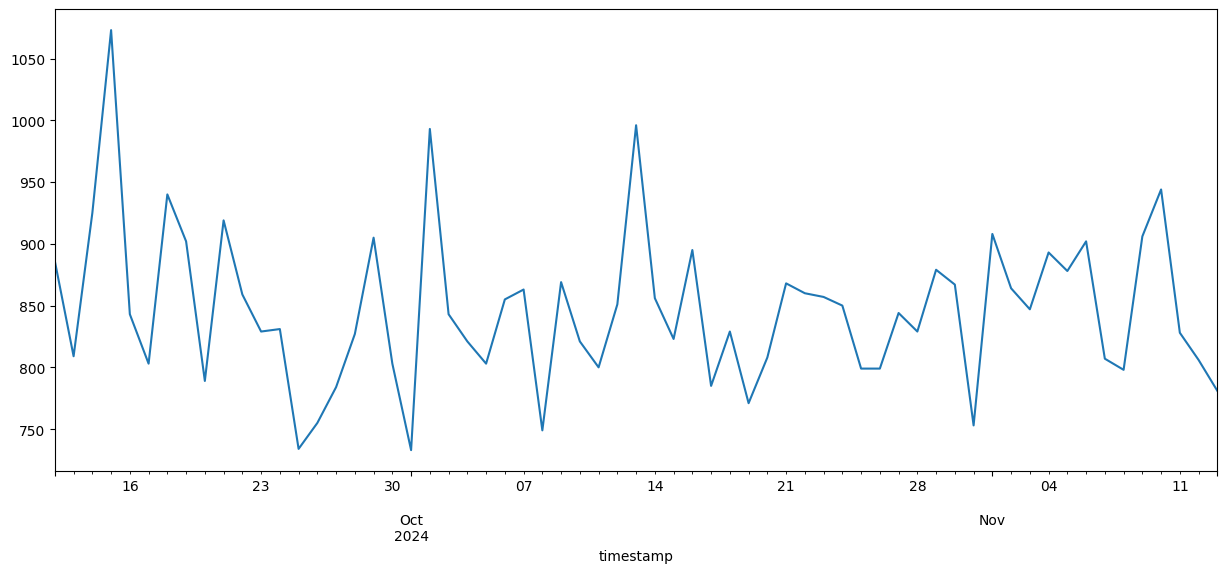

In [13]:
cars_per_day.plot(figsize=(15, 6))